<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

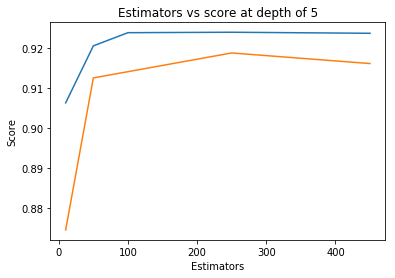

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


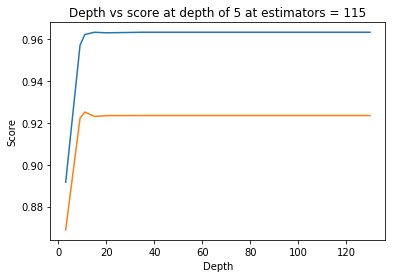

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


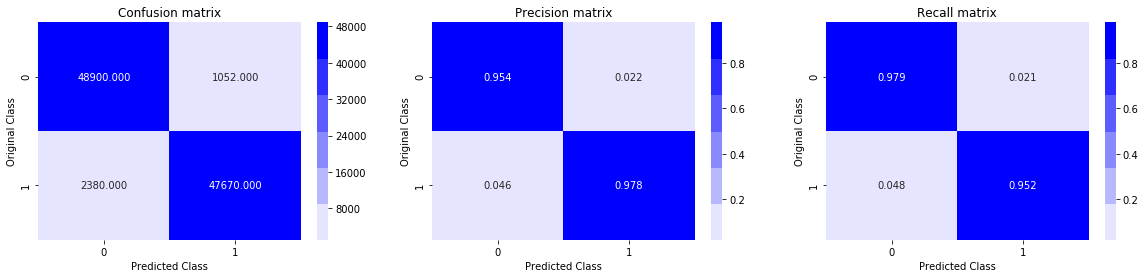

Test confusion_matrix


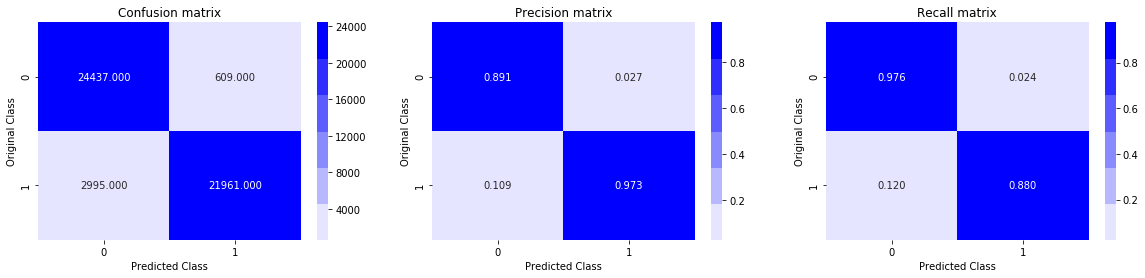

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

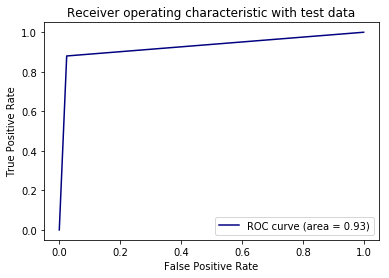

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

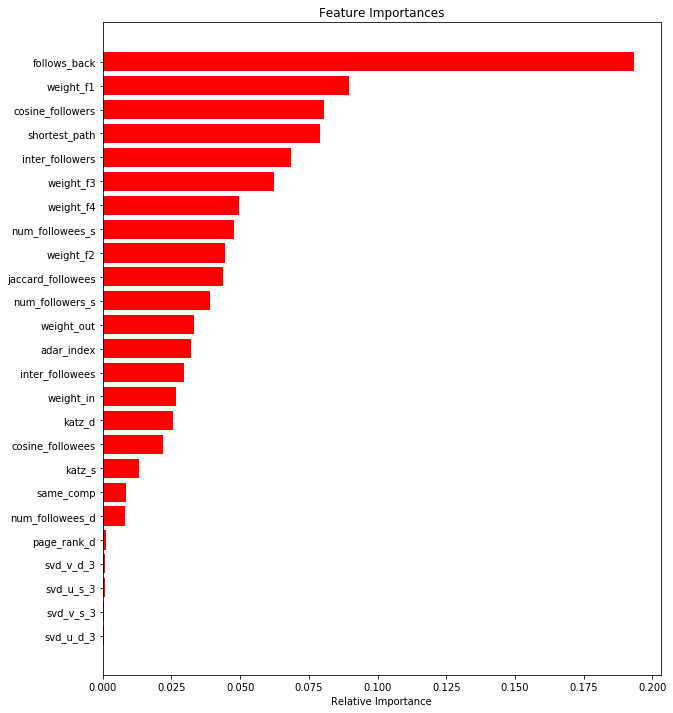

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [13]:
if os.path.isfile('train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [14]:
from pandas import read_hdf
final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [15]:
final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [16]:
train = final_train[['source_node','destination_node']]
test = final_test[['source_node','destination_node']]

In [17]:
train.shape

(100002, 2)

In [18]:
train.iloc[4]

source_node          140165
destination_node    1708748
Name: 4, dtype: int64

In [19]:
nodes_train = []
for i in range(len(train)):
    nodes_train.append(tuple(train.iloc[i]))

nodes_test = []
for j in range(len(test)):
    nodes_test.append(tuple(test.iloc[j]))

In [20]:
pref_score_train = []

for node in nodes_train:
    try:
        pref_score_train.append(train_graph.in_degree(node[0])*train_graph.in_degree(node[1]))
    except:
        pref_score_train.append(0)

In [21]:
pref_score_test = []

for node in nodes_test:
    try:
        pref_score_test.append(train_graph.in_degree(node[0])*train_graph.in_degree(node[1]))
    except:
        pref_score_test.append(0)

In [22]:
final_train['pref_attach_score'] = pref_score_train
final_test['pref_attach_score'] = pref_score_test

In [23]:
if not os.path.isfile('data/fea_sample/storage_sample_stage5.h5'):
    hdf = HDFStore('storage_sample_stage5.h5')
    hdf.put('train_df',final_train, format='table', data_columns=True)
    hdf.put('test_df',final_test, format='table', data_columns=True)
    hdf.close()

In [24]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [25]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [26]:
svd_dot_train=[]
for i in nodes_train:
    try:
        svd_dot_train.append(np.dot(U[i[0]],V[:,i[1]]))
    except:
        svd_dot_train.append(0)

In [27]:
svd_dot_test=[]
for i in nodes_test:
    try:
        svd_dot_test.append(np.dot(U[i[0]],V[:,i[1]]))
    except:
        svd_dot_test.append(0)

In [28]:
final_train['svd_dot'] = svd_dot_train
final_test['svd_dot'] = svd_dot_test

In [29]:
if not os.path.isfile('data/fea_sample/storage_sample_stage6.h5'):
    hdf = HDFStore('storage_sample_stage6.h5')
    hdf.put('train_df',final_train, format='table', data_columns=True)
    hdf.put('test_df',final_test, format='table', data_columns=True)
    hdf.close()

In [30]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage6.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage6.h5', 'test_df',mode='r')

In [31]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pref_attach_score', 'svd_dot'],
      dtype='object')

In [32]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [33]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [34]:
y_train.value_counts()

1    50050
0    49952
Name: indicator_link, dtype: int64

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
x_cfl=XGBClassifier(nthread=-1)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv=5,verbose=10,n_jobs=-1)
random_cfl.fit(df_final_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5 
[CV] subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5 
[CV] subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5 
[CV] subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5 
[CV] subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5 
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1 
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1 
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5, score=0.97655, total=  25.0s
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5, score=0.9768011599420029, total=  27.5s
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   28.4s
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5, score=0.9783510824458777, total=  27.9s
[CV] subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5, score=0.97505, total=  28.2s


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1 
[CV]  subsample=0.1, n_estimators=100, max_depth=10, learning_rate=0.05, colsample_bytree=0.5, score=0.9772, total=  28.1s
[CV] subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1, score=0.9703014849257537, total=  32.7s
[CV] subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1, score=0.9726513674316284, total=  32.6s
[CV] subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1, score=0.96945, total=  33.5s
[CV] subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1, score=0.9702, total=  32.4s
[CV] subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.05, colsample_bytree=0.1, score=0.97055, total=  32.3s
[CV] subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

[CV]  subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1, score=0.9779011049447528, total=  38.2s
[CV] subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1, score=0.9786010699465026, total=  38.1s
[CV] subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1, score=0.9758, total=  38.5s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1, score=0.9771, total=  38.2s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=5, learning_rate=0.15, colsample_bytree=0.1, score=0.9769, total=  38.6s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1, score=0.8931053447327634, total=   9.4s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1 


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1, score=0.8978551072446378, total=   9.4s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1, score=0.89035, total=   9.5s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1, score=0.8887, total=   9.5s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.1, score=0.88995, total=   9.6s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1, score=0.9779011049447528, total= 1.0min
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5, score=0.943702814859257, total=  24.0s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5, score=0.9474026298685065, total=  24.0s
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5, score=0.9446, total=  24.1s
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5, score=0.9455, total=  24.2s
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1, score=0.9792010399480026, total= 1.1min
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1, score=0.97445, total= 1.1min
[CV] subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.01, colsample_bytree=0.5, score=0.94525, total=  24.1s
[CV] subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1, score=0.9772, total= 1.1min
[CV] subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=500, max_depth=10, learning_rate=0.15, colsample_bytree=0.1, score=0.97685, total= 1.1min
[CV] subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1, score=0.9614519274036298, total=  26.9s
[CV] subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1, score=0.9633018349082546, total=  26.9s
[CV] subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1, score=0.9571, total=  27.0s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1, score=0.95855, total=  26.9s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.3, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.1, score=0.95795, total=  26.9s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.9644017799110044, total=  41.5s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.9657017149142543, total=  41.3s
[CV] subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.96405, total=  41.0s
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.96505, total=  41.4s
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.5, n_estimators=100, max_depth=5, learning_rate=0.03, colsample_bytree=1, score=0.9632, total=  41.2s
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1, score=0.9809509524523774, total= 3.3min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1 


[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  5.3min remaining:  1.2min
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1, score=0.9834008299585021, total= 3.3min
[CV] subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1 


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1, score=0.9799, total= 3.3min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1, score=0.9826, total= 3.3min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=1, n_estimators=200, max_depth=10, learning_rate=0.1, colsample_bytree=1, score=0.9812, total= 3.3min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1, score=0.9804509774511274, total= 8.2min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1, score=0.98, total= 7.3min


[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 13.0min remaining:   49.6s
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1, score=0.98, total= 7.7min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1, score=0.9809509524523774, total=11.6min


/home/madhupattipati948/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.1, n_estimators=2000, max_depth=10, learning_rate=0.05, colsample_bytree=1, score=0.9785, total=11.3min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.3min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [36]:
random_cfl.best_params_

{'subsample': 1,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [37]:
cfl=XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.1,colsample_bytree=1,subsample=1,nthread=-1)
cfl.fit(df_final_train,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [40]:
import warnings
warnings.filterwarnings("ignore")

y_train_pred = cfl.predict(df_final_train)
y_test_pred = cfl.predict(df_final_test)

In [39]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9994402462916316
Test f1 score 0.925903870693322


In [41]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


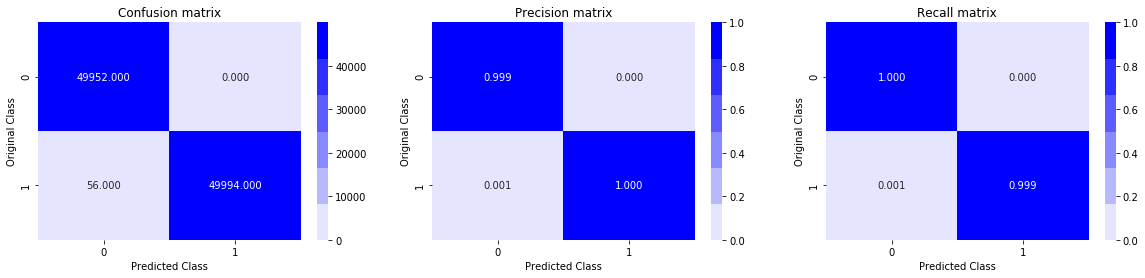

Test confusion_matrix


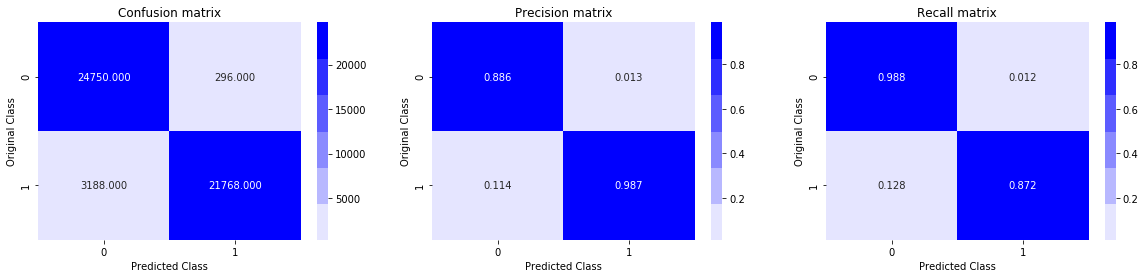

In [42]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

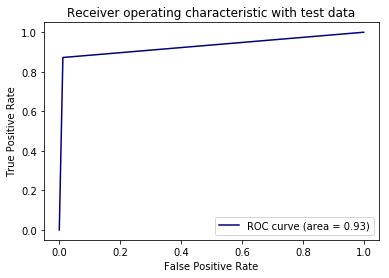

In [43]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

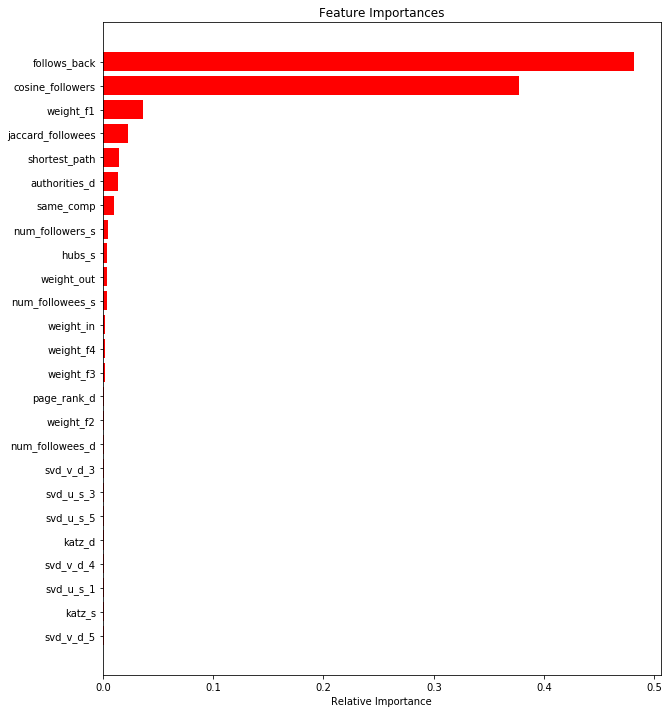

In [44]:
features = df_final_train.columns
importances = cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()